# Importing the Library

In [1]:
import pandas as pd

# Reading csv file using pandas.read_csv and saved in dataset variable

In [2]:
dataset=pd.read_csv("Book1.csv")

In [3]:
dataset

,Companies,Year of experience,Location,Salary
0,Accenture,1,Bangalore,380000
1,Wipro,1,Bangalore,380000
2,Amazon,1,Bangalore,380000
3,Accenture,1,Chennai,280000
4,Wipro,1,Chennai,390000
5,Amazon,1,Chennai,330000
6,Accenture,2,Bangalore,490000
7,Wipro,2,Bangalore,440000
8,Amazon,2,Bangalore,490000
9,Accenture,2,Chennai,480000


In [4]:
dataset.isnull().sum()

Companies             0
Year of experience    0
Location              0
Salary                0
dtype: int64

# From py File importing Class and save into a obj variable

In [5]:
from Univarite import Univarite
obj=Univarite()

# From  class importing QuanQual function and save into a quan,qual variable

In [6]:
quan,qual=obj.QuanQual(dataset)

Quan: ['Year of experience', 'Salary']
Qual: ['Companies', 'Location']


# Mean of salary column 

In [7]:
dataset["Salary"].mean()

484583.3333333333

# Median of salary column

In [8]:
dataset["Salary"].median()

485000.0

# Mode of salary column

In [9]:
dataset["Salary"].mode()[0]

380000

In [10]:
univariate=pd.DataFrame(index=["Mean","Median","Mode"],columns=quan)

In [11]:
univariate["Year of experience"]["Mean"]

nan

# Basic information of Quantitative data set

In [12]:
dataset.describe()

,Year of experience,Salary
count,24.00000,24.000000
mean,2.50000,484583.333333
std,1.14208,106280.153437
min,1.00000,280000.000000
25%,1.75000,390000.000000
50%,2.50000,485000.000000
75%,3.25000,572500.000000
max,4.00000,680000.000000


# Importing numpy Librarie and Calculating the percentile for salary column

In [13]:
import numpy as np
np.percentile(dataset["Salary"],1)

291500.0

##  Minimum salary of data analyst

In [14]:
dataset["Salary"].min()

280000

#  Highest salary of data analyst

In [15]:
dataset["Salary"].max()

680000

# Variance for salary column 

In [16]:
dataset["Salary"].var()

11295471014.492756

# Standard Deviation for salary column

In [17]:
dataset["Salary"].std()

106280.15343653187

# Kurtosis for salary column

In [18]:
dataset["Year of experience"].kurtosis()

-1.3939393939393936

# Skewness for salary column

In [19]:
dataset["Year of experience"].skew()

0.0

# Using for loop to print mean,median,mode...Skew,Kurtosis values for Quantitative data

In [20]:
univariate=pd.DataFrame(index=["Mean","Median","Mode","Min","25%","50%","75%",
                               "Max","IQR","1.5rule","Lesser","Greater","Variance","Std","Skew","Kurtosis"],columns=quan)
for column in quan:
    print(column)
    univariate[column]["Mean"]=dataset[column].mean()
    univariate[column]["Median"]=dataset[column].median()
    univariate[column]["Mode"]=dataset[column].mode()[0]
    univariate[column]["Min"]=dataset[column].min()
    univariate[column]["25%"]=np.percentile(dataset[column],25)
    univariate[column]["50%"]=np.percentile(dataset[column],50)
    univariate[column]["75%"]=np.percentile(dataset[column],75)
    univariate[column]["Max"]=np.percentile(dataset[column],100)
    univariate[column]["IQR"]=univariate[column]["75%"]-univariate[column]["25%"]
    univariate[column]["1.5rule"]=1.5*univariate[column]["IQR"]
    univariate[column]["Lesser"]=univariate[column]["25%"]-univariate[column]["1.5rule"]
    univariate[column]["Greater"]=univariate[column]["75%"]+univariate[column]["1.5rule"]
    univariate[column]["Variance"]=dataset[column].var()
    univariate[column]["Std"]=dataset[column].std()
    univariate[column]["Skew"]=dataset[column].skew()
    univariate[column]["Kurtosis"]=dataset[column].kurtosis()  
    

Year of experience
Salary


In [21]:
lesser=[]
greater=[]
for column in quan:
    if(univariate[column]["Min"]<univariate[column]["Lesser"]):
        lesser.append(column)
    if(univariate[column]["Max"]>univariate[column]["Greater"]):
        greater.append(column)

In [22]:
lesser

[]

In [23]:
greater

[]

In [24]:
univariate["Salary"]["Lesser"]

116250.0

In [25]:
univariate

,Year of experience,Salary
Mean,2.5,484583
Median,2.5,485000
Mode,1,380000
Min,1,280000
25%,1.75,390000
50%,2.5,485000
75%,3.25,572500
Max,4,680000
IQR,1.5,182500
1.5rule,2.25,273750


# Descriptive
#### 25% of Data Analyst salary falls between 280000 to 390000
### 50% of Data Analyst salary falls between 280000 to 485000
## 75% of Data Analyst salary falls between 280000 to 572500
# Reminig 25% of Data Analyst Salary falls between 280000 to 680000

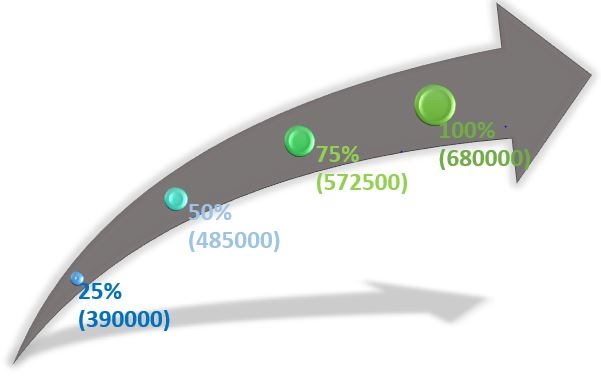

# Inference
### First 75% of data Analyst salary is lesser than compared to Last 25% of Data Analyst 
### Because the last 25% of Data Analyst have more skills and experience in this field
## If the 75% of Data Analyst improve their skills and experience to get more salary

In [26]:
import seaborn as sns

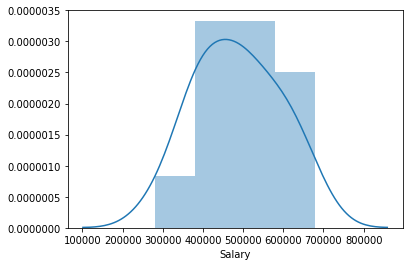

In [27]:
sns.distplot(dataset["Salary"])

# Probability density function

In [28]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    
#Displaying the curve and histrogram of dataset using sns.distplot
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    
#It is helps to create a vertical line between starting and ending 
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
# generate a sample dataset
    sample = dataset
    
# calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
# define the distribution
    dist = norm(sample_mean, sample_std)
    
# probabilities of sample dataset for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

## 17% of data analyst gets salary upto 300000 to 400000 and 30% gets 500000 to 600000

Mean=484583.333, Standard Deviation=106280.153
The area between range(500000,600000):0.3035868532755698


0.3035868532755698

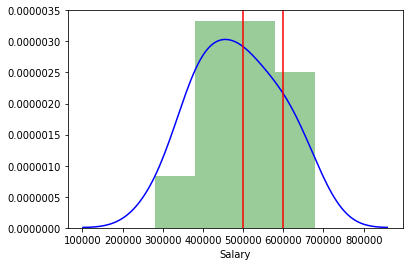

In [29]:
get_pdf_probability(dataset["Salary"],500000,600000)

# Cumulative Density function

(array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
        0.04166667, 0.04166667, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.20833333, 0.20833333, 0.29166667, 0.29166667, 0.29166667,
        0.29166667, 0.29166667, 0.29166667, 0.29166667, 0.29166667,
        0.33333333, 0.33333333, 0.375     , 0.375     , 0.375     ,
        0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.41666667,
        0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.41666667,
        0.5       , 0.5       , 0.58333333, 0.58333333, 0.58333333,
        0.58333333, 0.58333333, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.70833333, 0.70833333, 0.70833333, 0.70833333, 0.70833333,
        0.70833333, 0.70833333, 0.75      , 0.75

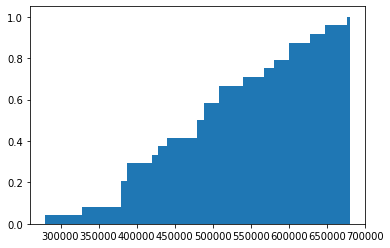

In [30]:
import matplotlib.pyplot as plt
x=dataset['Salary']
plt.hist(x,cumulative=True, density=True,bins=100)

# Converting Normal Distribution to Standard Normal Distribution

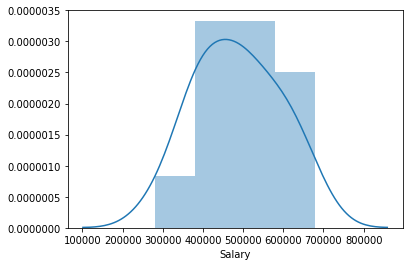

In [31]:
sns.distplot(dataset["Salary"])

# Coverted to standard Normal Distribution

In [32]:
def stdNBgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)

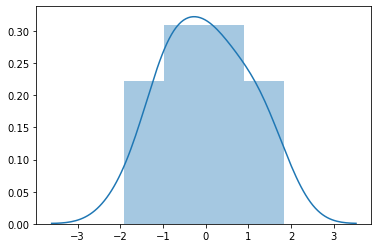

In [33]:
stdNBgraph(dataset["Salary"])